In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../1d_cook/1d_cook_results.csv')
df.head()

,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,robust_m_est_bias,robust_m_est_variance,robust_mm_est_bias,robust_mm_est_variance,robust_s_est_bias,robust_s_est_variance,ols_est_bias,ols_est_variance,ols_diag_est_bias,ols_diag_est_variance,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe
0,0.0,0.0,0,1,-0.000133,0.005914,-0.000432,0.005983,-0.004388,0.022104,0.000815,0.005525,-0.002385,0.008258,1.008618,1.009374,1.009340,1.035503,1.013187
1,0.0,0.0,0,2,0.006323,0.006196,0.005880,0.006167,0.006410,0.019129,0.005550,0.005714,0.006368,0.007969,1.023765,1.024717,1.024790,1.052055,1.027311
2,0.0,0.0,0,3,0.007888,0.005817,0.008063,0.005887,0.021342,0.021372,0.006763,0.005384,0.007211,0.007418,1.011380,1.012028,1.012090,1.040695,1.014862
3,0.0,0.0,0,4,-0.000841,0.004619,-0.000935,0.004603,0.005852,0.013541,-0.002311,0.004644,-0.001256,0.005584,1.007886,1.008062,1.008312,1.031872,1.009523
4,0.0,0.1,0,1,0.006792,0.004864,0.007126,0.004814,0.014380,0.015530,0.005891,0.004648,0.009131,0.005277,1.014514,1.015133,1.015032,1.040898,1.017384


In [5]:
df.columns

Index(['contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff',
       'robust_m_est_bias', 'robust_m_est_variance', 'robust_mm_est_bias',
       'robust_mm_est_variance', 'robust_s_est_bias', 'robust_s_est_variance',
       'ols_est_bias', 'ols_est_variance', 'ols_diag_est_bias',
       'ols_diag_est_variance', 'ols_mspe', 'robust_m_mspe', 'robust_mm_mspe',
       'robust_s_mspe', 'ols_diag_mspe'],
      dtype='object')

In [6]:
feature_columns = ['contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff']
mpse_columns = ['ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe', 'ols_diag_mspe']
bias_columns = ['ols_est_bias', 'robust_m_est_bias', 'robust_mm_est_bias', 'robust_s_est_bias', 'ols_diag_est_bias']
variance_columns = ['ols_est_variance', 'robust_m_est_variance', 'robust_mm_est_variance', 'robust_s_est_variance', 'ols_diag_est_variance']

In [9]:
# ploting for mpse, first melt the dataframe
df_mpse = df[feature_columns + mpse_columns]
df_mpse = df_mpse.melt(id_vars=feature_columns, value_vars=mpse_columns, var_name='method', value_name='mpse')
df_mpse['method'] = df_mpse['method'].str.replace('_mspe', '')
df_mpse.head()


,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,method,mpse
0,0.0,0.0,0,1,ols,1.008618
1,0.0,0.0,0,2,ols,1.023765
2,0.0,0.0,0,3,ols,1.011380
3,0.0,0.0,0,4,ols,1.007886
4,0.0,0.1,0,1,ols,1.014514


In [13]:
df_mpse = df_mpse[df_mpse['method'] == 'ols_diag']
df_mpse.head()

,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,method,mpse
480,0.0,0.0,0,1,ols_diag,1.013187
481,0.0,0.0,0,2,ols_diag,1.027311
482,0.0,0.0,0,3,ols_diag,1.014862
483,0.0,0.0,0,4,ols_diag,1.009523
484,0.0,0.1,0,1,ols_diag,1.017384


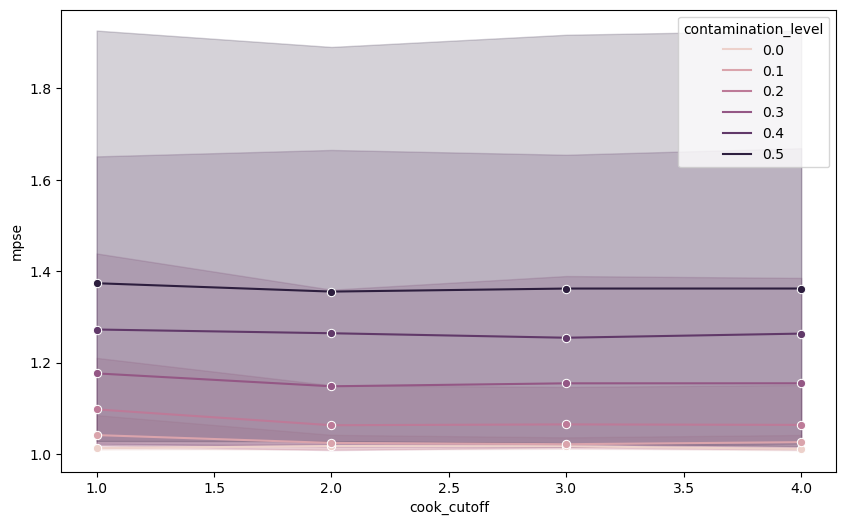

In [15]:
# plotting for mpse
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df_mpse, x='cook_cutoff', y='mpse', hue='contamination_level', marker='o', ax=ax)
plt.show()

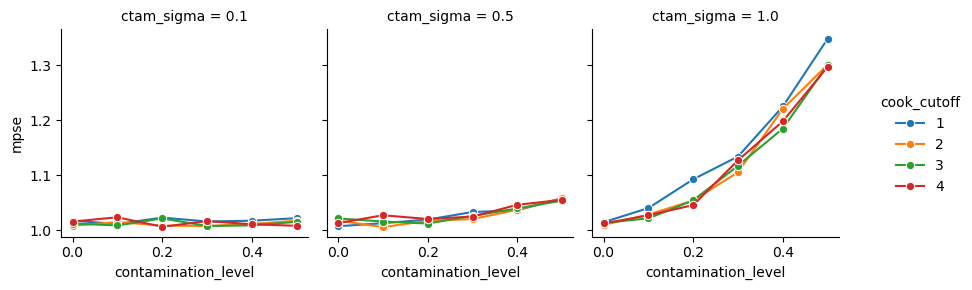

In [19]:
df_mpse_mu0 = df_mpse[
    (df_mpse['ctam_mu'] == 0) &
    (df_mpse['ctam_sigma'].isin([0.1, 0.5, 1]))
]

# Facet it by sigma, set mu = 0, sigma = 0.5, 1, 2
g = sns.FacetGrid(df_mpse_mu0, col='ctam_sigma', hue='cook_cutoff', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'mpse', marker='o')
g.add_legend()
plt.show()